In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, FixedLocator, LogFormatterMathtext


import numpy as np

from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [23]:
tstart = "2022-04-20 03:40"
tend = "2022-04-20 04:30"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
result

Start Time,End Time,Instrument,SatelliteNumber,Physobs,Source,Provider,Resolution
Time,Time,str3,int64,str10,str4,str4,str5
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,16,irradiance,GOES,NOAA,flx1s
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,16,irradiance,GOES,NOAA,avg1m
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,17,irradiance,GOES,NOAA,flx1s
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,17,irradiance,GOES,NOAA,avg1m


In [24]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16), a.Resolution("flx1s"))
print(result_goes16)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2022-04-20 00:00:00.000 2022-04-20 23:59:59.999 ...     NOAA      flx1s




In [25]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  3.01file/s]


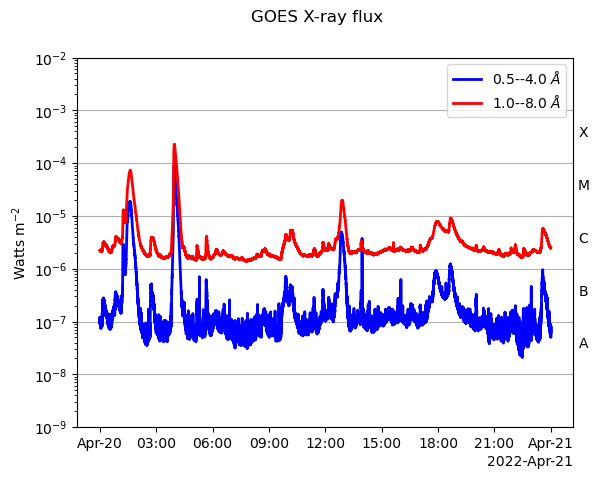

In [26]:
goes_16 = ts.TimeSeries(file_goes16)
goes_16.peek()

In [27]:
# Definir el rango de tiempo para filtrar
start_time = "2022-04-20 03:40"
end_time = "2022-04-20 04:30"

In [28]:
# Filtrar los datos entre las horas especificadas
filtered_data = goes_16.data.loc[start_time:end_time]

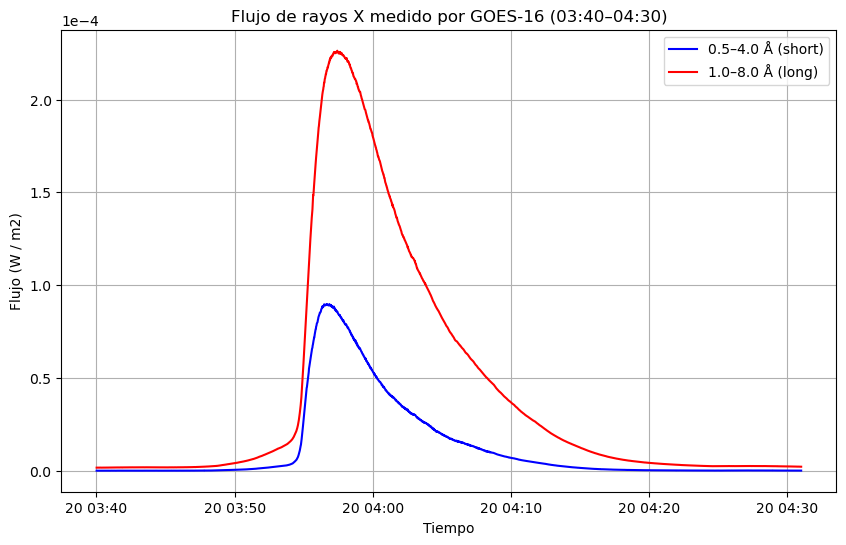

In [29]:
# Graficar solo el rango filtrado
fig, ax = plt.subplots(figsize=(10, 6))
# Extraer columnas específicas para graficar
ax.plot(filtered_data.index, filtered_data['xrsa'], label="0.5–4.0 Å (short)", color="blue")
ax.plot(filtered_data.index, filtered_data['xrsb'], label="1.0–8.0 Å (long)", color="red")

# Agregar detalles a la gráfica
ax.set_title("Flujo de rayos X medido por GOES-16 (03:40–04:30)")
ax.set_xlabel("Tiempo")

ax.set_ylabel(f"Flujo ({goes_16.units['xrsa']})")

ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax.legend()
ax.grid(True)

plt.show()

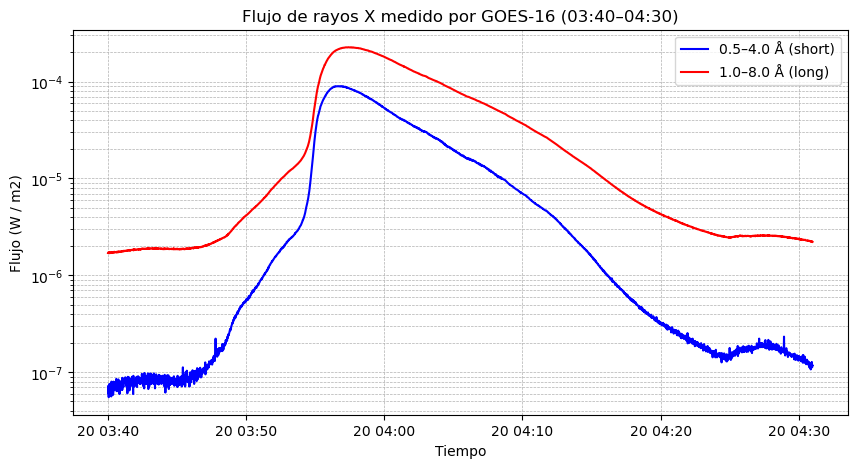

In [33]:
# Graficar solo el rango filtrado
fig, ax = plt.subplots(figsize=(10, 5))

# Extraer columnas específicas para graficar
ax.plot(filtered_data.index, filtered_data['xrsa'], label="0.5–4.0 Å (short)", color="blue")
ax.plot(filtered_data.index, filtered_data['xrsb'], label="1.0–8.0 Å (long)", color="red")

# Configurar el eje Y en escala logarítmica con notación científica
ax.set_yscale("log")
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_formatter(LogFormatterMathtext())

# Etiquetas y título
ax.set_title("Flujo de rayos X medido por GOES-16 (03:40–04:30)")
ax.set_xlabel("Tiempo")
ax.set_ylabel(f"Flujo ({goes_16.units['xrsa']})")

# Agregar leyenda y cuadrícula
ax.legend()
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()